# Lab Tutorial 02
### Learning Outcomes 
In this tutorial we will learn 
- to create 2D numpy arrays and work with them
- how to use plt.subplots to have multiple plots
- about n-dimensional numpy arrays
- how to create a contingency table and work with it
- how to group data by a specific variable (like gender)

We will be using the student performance dataset found here:\
https://www.kaggle.com/spscientist/students-performance-in-exams

## importing packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Python prerequisites

## Working with n-dimensional numpy arrays

### different ways to create n-dimensional arrays

## indexing rows and columns of a 2D array

In [22]:
# more on indexing 1D arrays first 

### looping through elements of a 2D array

In [23]:
# Looping throw rows and columns using two for-loops


## String formatting and print statements using f-strings

In [27]:
# String formatting: https://www.w3schools.com/python/python_string_formatting.asp

# how to have nice print statements
## * Use print statements to check the code


# The Student performance dataset

## load in the dataset

In [12]:
# load, display, get the columns and rows
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

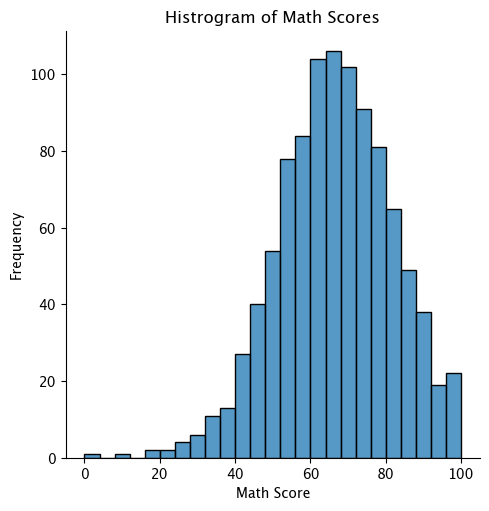

In [16]:
# PLOT HSITOFRAMS OF SOME COLUMS 
ax = sns.displot(df["math score"])
ax.set(title = "Histrogram of Math Scores", xlabel = "Math Score", ylabel = "Frequency")

## Creating contingency tables

### getting help from documents
if you google pandas crosstab, you'll see that there are two links: one for pandas version 0.25.3 and another for pandas version 0.23.4. 
* https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

Which one do you use? To answer that first you need to find your version of Pandas.

In [17]:
# finding the version of Pandas installed
pd.__version__

'2.2.3'

Now what? my installed version is different from the versions that came up in google search. Two ways to work around:
* google pandas crosstab 0.25.1 (or whatever your version of pandas is)
* google the versions: 0.25.1 and 0.25.3:
https://pandas.pydata.org/pandas-docs/version/0.25/whatsnew/v0.25.3.html

In [40]:
# Gender and parental level of education
table = pd.crosstab(df["gender"], df["parental level of education"], margins = True)

# what are the first, second, and third inputs
## the first input will be the rows
## the second input the columns 
## set the third input "margins" to True if you want to get the margins as well
## print type, indices, and columns
display(table)

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,All
gender,,,,,,,
female,116,63,94,36,118,91,518
male,106,55,102,23,108,88,482
All,222,118,196,59,226,179,1000


In [29]:
# use for loop to get all the rows (1)
## when using i as a number pointing to the index
### with iloc
table.iloc[0]

parental level of education
associate's degree    116
bachelor's degree      63
high school            94
master's degree        36
some college          118
some high school       91
All                   518
Name: female, dtype: int64

In [30]:
table.index

Index(['female', 'male', 'All'], dtype='object', name='gender')

In [31]:
# use for loop to get all the rows (2)
## when using i as the lable of the index itself
### with loc
#### what is the difference between loc and iloc
for i in range(len(table.index)):
    print(f"data on the number {i} in the table dataframe is {table.iloc[i]}")

data on the number 0 in the table dataframe is parental level of education
associate's degree    116
bachelor's degree      63
high school            94
master's degree        36
some college          118
some high school       91
All                   518
Name: female, dtype: int64
data on the number 1 in the table dataframe is parental level of education
associate's degree    106
bachelor's degree      55
high school           102
master's degree        23
some college          108
some high school       88
All                   482
Name: male, dtype: int64
data on the number 2 in the table dataframe is parental level of education
associate's degree     222
bachelor's degree      118
high school            196
master's degree         59
some college           226
some high school       179
All                   1000
Name: All, dtype: int64


In [36]:
for i in table.index:
    print(f"data on the {i} in the table dataframe is {table.loc[i]}")

data on the female in the table dataframe is parental level of education
associate's degree    116
bachelor's degree      63
high school            94
master's degree        36
some college          118
some high school       91
All                   518
Name: female, dtype: int64
data on the male in the table dataframe is parental level of education
associate's degree    106
bachelor's degree      55
high school           102
master's degree        23
some college          108
some high school       88
All                   482
Name: male, dtype: int64
data on the All in the table dataframe is parental level of education
associate's degree     222
bachelor's degree      118
high school            196
master's degree         59
some college           226
some high school       179
All                   1000
Name: All, dtype: int64


In [40]:
# Use the same method to get the data in each column (volunteers needed)


### Getting different entries of a contingency table

In [37]:
# you may want to use these entries to calculate different probabilities
table["high school"]["female"]

np.int64(94)

## TO ADD: 
Go thorugh from lecture how you would get 
* Joint probability 
* Marginal probability
* Conditional probability


In [ ]:
# Marginal probabilty of selecting a female student
table["All"]["female"] / table["All"]["All"]

In [42]:
# Marginal probaility of selecting a student that has a parental level of education of some college
table["some college"]["All"] / table["All"]["All"]
#     col             row     

np.float64(0.226)

In [48]:
# Conditional probability of selecting a student that has a parental level of education of some college
# female

#Bayes Rule:   P(S | F) = P(S and F) / P(F)
p_some_college_and_female = table["some college"]["female"]/table["All"]["All"]
print(p_some_college_and_female)

p_female = table["All"]["female"]/table["All"]["All"]
print(p_female)

p_some_college_and_female/p_female

0.118
0.518


np.float64(0.2277992277992278)

In [49]:
# Other way if you have a table with counts
# P(S | F) = # some college and female / # female

table["some college"]["female"] / table["All"]["female"]


np.float64(0.2277992277992278)

## Use Groupby method to categorize the dataset

In [51]:
a = df["reading score"].groupby(df["gender"])
a

### getting the names of different sub-catogories

In [54]:
b = df.groupby("parental level of education").groups.keys()
b

dict_keys(["associate's degree", "bachelor's degree", 'high school', "master's degree", 'some college', 'some high school'])

### getting descriptive statistic by category

In [63]:

# you can do the same for min, max, and mean
mean_score_grouped = df["math score"].groupby(df["gender"]).mean()


print(f"The mean math score for females is {mean_score_grouped['female']}")

The mean math score for females is 63.633204633204635


# Visualization

## Using pandas plot method
see the link below for all the kinds of plotting available <font color = 'red'>__(what are the inputs for grouped bar plot?)__:<br>
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

In [66]:
# USE STACKED BAR PLOT INSTEAD OF PIE CHARTS, PLEASe1 


# Use the doc and go over this in the lab
# table2 = pd.crosstab(df['race/ethnicity'], df['test preparation course'], margins = True)
# table2.plot(kind = 'bar', stacked = False)

# lose the last coloumn "All"

# pie plots

table2 = pd.crosstab(df['race/ethnicity'], df['test preparation course'], margins = False)
table2 = 


SyntaxError: invalid syntax (728080041.py, line 11)

## Using pyplot subplots to have multiple figures

## Have multiple plots in a single figure with different colors

AttributeError: module 'seaborn' has no attribute 'violingplot'

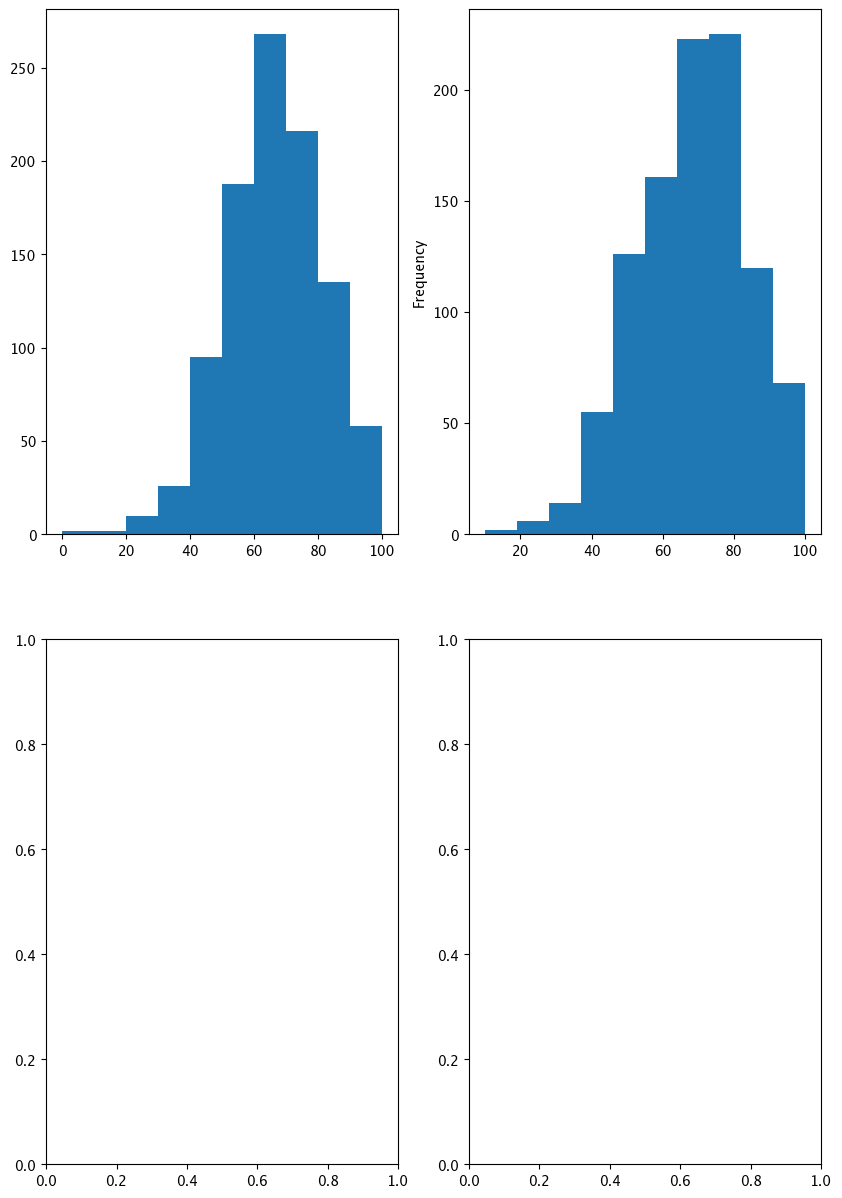

In [67]:
 # alpha sets the transparency
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,15))

axes[0,0].hist(df["math score"])
df["writing score"].plot(kind = "hist", ax = axes[0,1])
sns.violingplot(df["reading score"], ax = axes[1,1])


## multiple violinplots in a single figure

In [46]:
# do it with them! use the doc 
# doc link: https://seaborn.pydata.org/generated/seaborn.violinplot.html
